## Setup & Installation

In [1]:
# Install required packages
!pip install ultralytics roboflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import os
from roboflow import Roboflow
from IPython.display import Image, display
from ultralytics import YOLO

HOME = os.getcwd()
print(f"✓ Libraries imported | Working directory: {HOME}")

✓ Libraries imported | Working directory: c:\Users\elasm\VeoVision\VeoVision


## Dataset Preparation

In [3]:
# Download dataset from Roboflow
rf = Roboflow(api_key="hd9JVPLTXknvT63NGNkP")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov8")

print(f"✓ Dataset downloaded to: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...
loading Roboflow project...
✓ Dataset downloaded to: c:\Users\elasm\VeoVision\VeoVision\football-players-detection-20
✓ Dataset downloaded to: c:\Users\elasm\VeoVision\VeoVision\football-players-detection-20


In [4]:
# Update data.yaml paths for Ultralytics
!sed -i 's|train:.*|train: ../train/images|' {dataset.location}/data.yaml
!sed -i 's|val:.*|val: ../valid/images|' {dataset.location}/data.yaml

print("✓ Dataset configuration updated")

'sed' is not recognized as an internal or external command,
operable program or batch file.


✓ Dataset configuration updated


'sed' is not recognized as an internal or external command,
operable program or batch file.


## Training Models

### Train6: High-Resolution Model (50 epochs)
- Image size: 1280px
- Epochs: 50
- Results: 83.1% mAP50, 50.1% ball detection

In [ ]:
# Train high-resolution model (train6)
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt \
  data={dataset.location}/data.yaml \
  batch=2 epochs=50 imgsz=1280 \
  plots=True device=cpu

print("\n✓ Train6 completed: runs/detect/train6/weights/best.pt")

### Train9: Extended Training (100 epochs) - BEST MODEL
- Image size: 1280px
- Epochs: 100
- Batch: 4
- Results: 85.5% mAP50, 56.3% ball detection

In [5]:
# Train extended model (train9) - BEST PERFORMANCE
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt \
  data={dataset.location}/data.yaml \
  batch=4 epochs=100 imgsz=1280 \
  patience=20 plots=True device=cpu

print("\n✓ Train9 completed: runs/detect/train9/weights/best.pt")

c:\Users\elasm\VeoVision\VeoVision
^C

✓ Train9 completed: runs/detect/train9/weights/best.pt


## Model Validation

In [ ]:
# Validate train6 model
%cd {HOME}

!yolo task=detect mode=val \
  model=runs/detect/train6/weights/best.pt \
  data=football-players-detection-20/data.yaml \
  imgsz=1280

In [6]:
# Validate train9 model (BEST)
%cd {HOME}

!yolo task=detect mode=val \
  model=runs/detect/train9/weights/best.pt \
  data=football-players-detection-20/data.yaml \
  imgsz=1280

c:\Users\elasm\VeoVision\VeoVision
Ultralytics 8.3.226  Python-3.12.6 torch-2.4.1+cpu CPU (12th Gen Intel Core i9-12900K)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 190.3178.0 MB/s, size: 50.8 KB)

val: Scanning C:\Users\elasm\VeoVision\VeoVision\football-players-detection-20\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49  0.0s
val: Scanning C:\Users\elasm\VeoVision\VeoVision\football-players-detection-20\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49  0.0s

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 25% ━━━───────── 1/4 0.1it/s 2.8s<28.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 50% ━━━━━━────── 2/4 0.2it/s 5.5s<10.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 75% ━━━━━━━━━─── 3/4 0.2it/s 8

## View Training Results

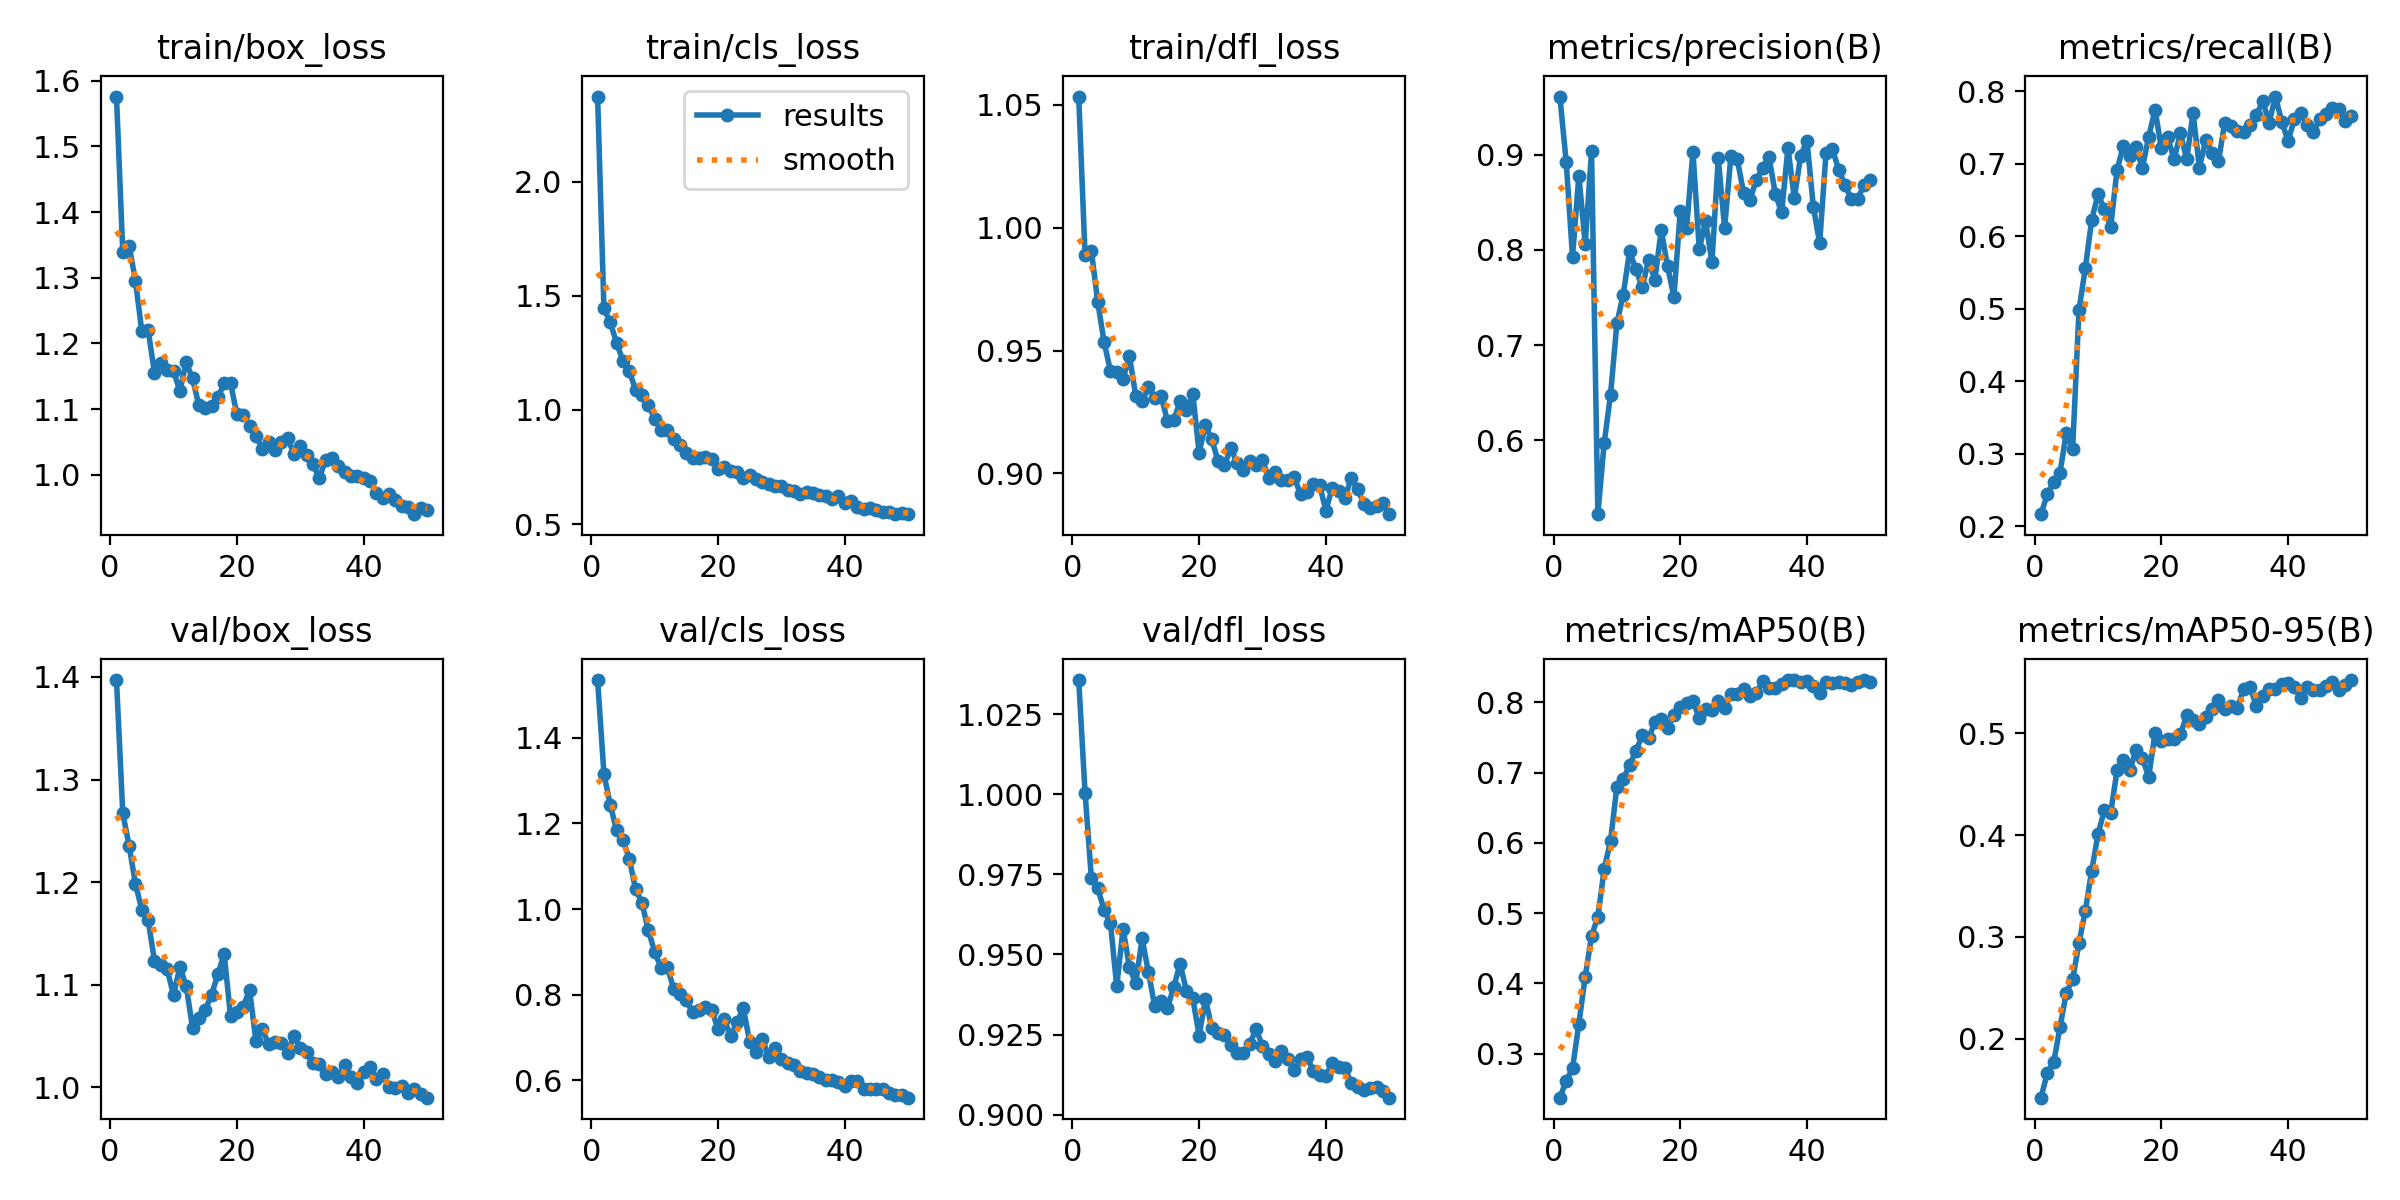

In [7]:
# Display train6 results
display(Image(filename='runs/detect/train6/results.png', width=900))

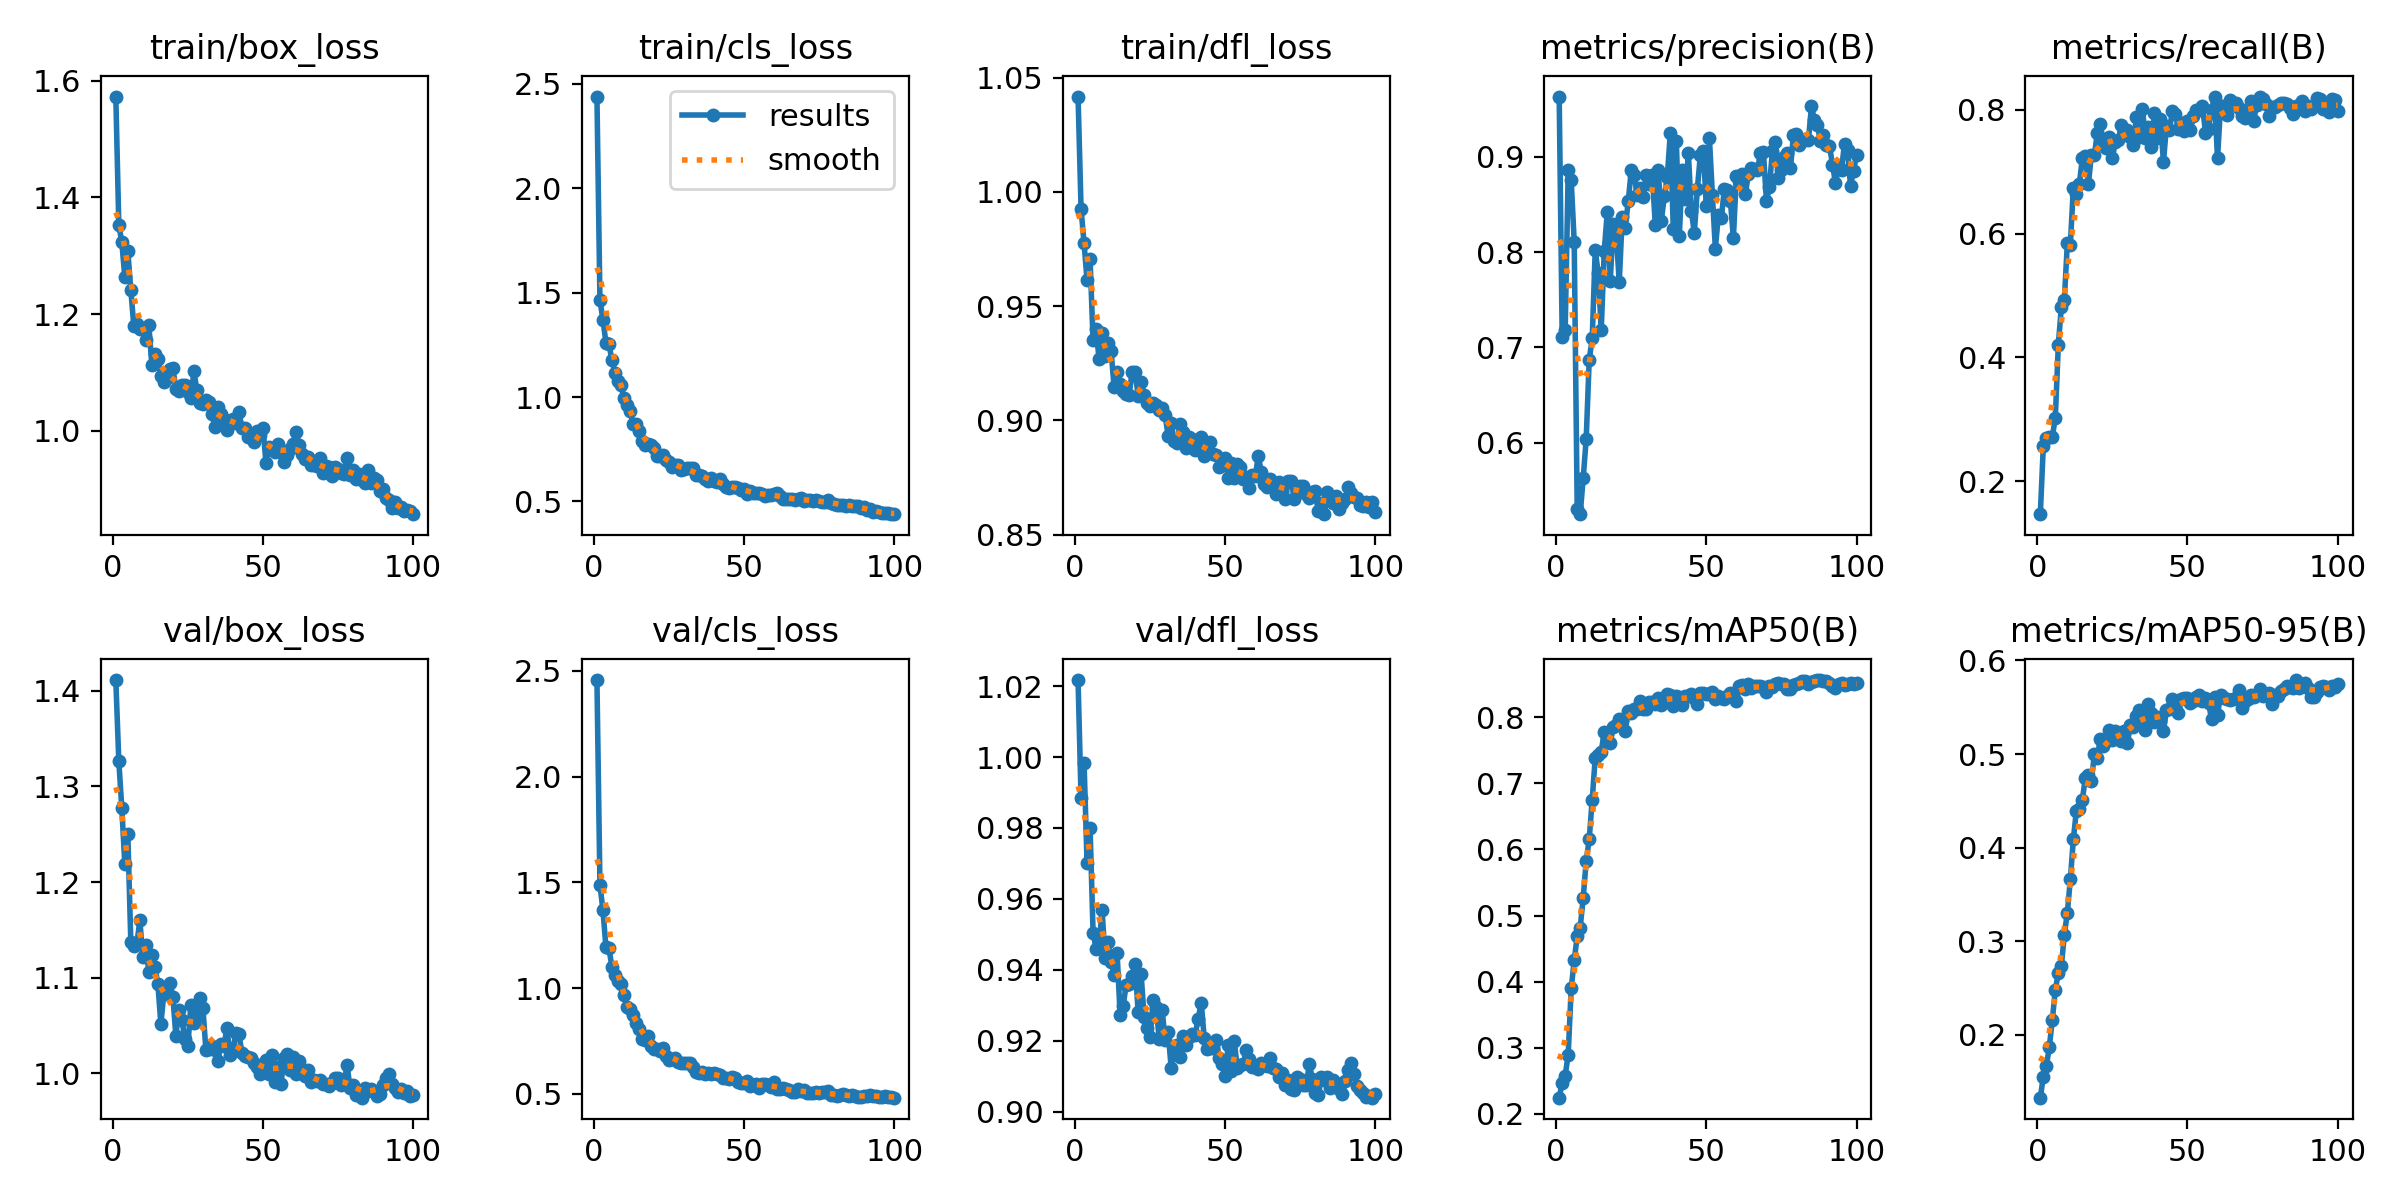

In [8]:
# Display train9 results (BEST)
display(Image(filename='runs/detect/train9/results.png', width=900))

## Using the Trained Model

```python
# Load the best model
model = YOLO('runs/detect/train9/weights/best.pt')

# Run inference on an image
results = model('path/to/your/image.jpg')

# Display results
results[0].show()
```

---

## Training Summary

| Model | Epochs | Resolution | Batch | Overall mAP50 | Ball mAP50 |
|-------|--------|------------|-------|---------------|------------|
| train6 | 50 | 1280px | 2 | 83.1% | 50.1% |
| **train9** | **100** | **1280px** | **4** | **85.5%** | **56.3%** |

## Roboflow Project

Dataset uploaded to Roboflow for collaboration and version control.

In [14]:
# Dataset uploaded to Roboflow
print("✓ Dataset uploaded to Roboflow")
print("✓ Project: vio-vision/veovision-tnp3c")
print("✓ Version: 1")
print(f"✓ View project: https://app.roboflow.com/vio-vision/veovision-tnp3c")
print("\nClasses: ball, goalkeeper, player, referee")

✓ Dataset uploaded to Roboflow
✓ Project: vio-vision/veovision-tnp3c
✓ Version: 1
✓ View project: https://app.roboflow.com/vio-vision/veovision-tnp3c

Classes: ball, goalkeeper, player, referee
